In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir(".."))

['test_RUL_FD001_100x50.json', 'train_RUL_FD001_100x50.json', '.DS_Store', 'newData', 'selectedModel', 'test_FD001_100x50.json', 'preprocessing', 'train_FD001_100x50.json', 'networkModel']


In [2]:
import json
with open("service1906_1506.json") as of:
    data = json.load(of)

In [3]:
computes = [c for c in data.keys() if c!="timespan"]
variables = [v for v in data[computes[0]] if v!='index' and v!='arrJob_scheduling']

In [4]:
print(computes)
print(variables)

['compute-1-1', 'compute-1-10', 'compute-1-11', 'compute-1-12', 'compute-1-13', 'compute-1-14', 'compute-1-15', 'compute-1-16', 'compute-1-17', 'compute-1-18', 'compute-1-19', 'compute-1-2', 'compute-1-20', 'compute-1-21', 'compute-1-22', 'compute-1-23', 'compute-1-24', 'compute-1-25', 'compute-1-26', 'compute-1-27', 'compute-1-28', 'compute-1-29', 'compute-1-3', 'compute-1-30', 'compute-1-31', 'compute-1-32', 'compute-1-33', 'compute-1-34', 'compute-1-35', 'compute-1-36', 'compute-1-37', 'compute-1-38', 'compute-1-39', 'compute-1-4', 'compute-1-40', 'compute-1-41', 'compute-1-42', 'compute-1-43', 'compute-1-44', 'compute-1-45', 'compute-1-46', 'compute-1-47', 'compute-1-48', 'compute-1-49', 'compute-1-5', 'compute-1-50', 'compute-1-51', 'compute-1-52', 'compute-1-53', 'compute-1-54', 'compute-1-55', 'compute-1-56', 'compute-1-57', 'compute-1-58', 'compute-1-59', 'compute-1-6', 'compute-1-60', 'compute-1-7', 'compute-1-8', 'compute-1-9', 'compute-10-25', 'compute-10-26', 'compute-10-27

In [5]:
#Check empty array
def getEmptyArr(data, c):
    cObj = data[c]
    cDf = pd.DataFrame()
    cDf['compute'] = [c for _ in data['timespan']]
    cDf['timespan'] = data['timespan']
    for v in variables:
        vArr = np.array(cObj[v])
        if len(vArr)==0:
            print('c=', c)
            print('v=', v)
for c in computes:
    getEmptyArr(data, c)

c= compute-1-26
v= arrTemperature


In [6]:
def addTarget(cDf, predictedVar, predictedStep):
    cDf[target] = cDf[predictedVar].shift(-predictedStep)
    cDf.dropna(inplace=True)

In [7]:
def getComputeDf(data, c, predictedVar, predictedStep):
    cObj = data[c]
    cDf = pd.DataFrame()
    cDf['compute'] = [c for _ in data['timespan']]
    cDf['timespan'] = data['timespan']
    for v in variables:
        vArr = np.array(cObj[v])
        if len(vArr)==0:
            return None
        else:
            for i in range(len(vArr[0])):
                cDf[v+str(i)] = vArr[:, i]
    cDf['timespan'] = pd.to_datetime(cDf['timespan'])
    print(predictedVar)
    addTarget(cDf, predictedVar, predictedStep)
    return cDf

In [8]:
predictedVar = 'arrTemperature0'
target = predictedVar + "_target"
predictedSteps = 4
df = pd.concat([x for x in [getComputeDf(data, c, predictedVar, predictedSteps) for c in computes] if type(x)!="NoneType"])

arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTemperature0
arrTempe

In [9]:
df = df.reset_index().drop('index', axis=1)

print(df.head(2000))

          compute                  timespan arrTemperature0 arrTemperature1  \
0     compute-1-1 2019-06-09 00:00:00+00:00              73              59   
1     compute-1-1 2019-06-09 00:05:00+00:00              73              59   
2     compute-1-1 2019-06-09 00:10:00+00:00              73              59   
3     compute-1-1 2019-06-09 00:15:00+00:00              73              59   
4     compute-1-1 2019-06-09 00:20:00+00:00              73              59   
...           ...                       ...             ...             ...   
1995  compute-1-1 2019-06-15 22:15:00+00:00              42              35   
1996  compute-1-1 2019-06-15 22:20:00+00:00              42              35   
1997  compute-1-1 2019-06-15 22:25:00+00:00              42              35   
1998  compute-1-1 2019-06-15 22:30:00+00:00              42              35   
1999  compute-1-1 2019-06-15 22:35:00+00:00              42              35   

     arrTemperature2 arrCPU_load0 arrMemory_usage0 

In [10]:
features = [x for x in df.columns if x not in ['compute', 'timespan', 'arrTemperature0_target']]

In [11]:
features

['arrTemperature0',
 'arrTemperature1',
 'arrTemperature2',
 'arrCPU_load0',
 'arrMemory_usage0',
 'arrFans_health0',
 'arrFans_health1',
 'arrFans_health2',
 'arrFans_health3',
 'arrPower_usage0']

# Plot and see data distribution

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
def plotAttrDataOfId(data, compute, features):
    plt.figure(figsize=(30, 20))
    for i, v in enumerate(features):
        plt.subplot(10, 3, i+1)
        cDf = df[df['compute']==compute]
        plt.plot(cDf['timespan'], cDf[v])
        plt.title(v)
        plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


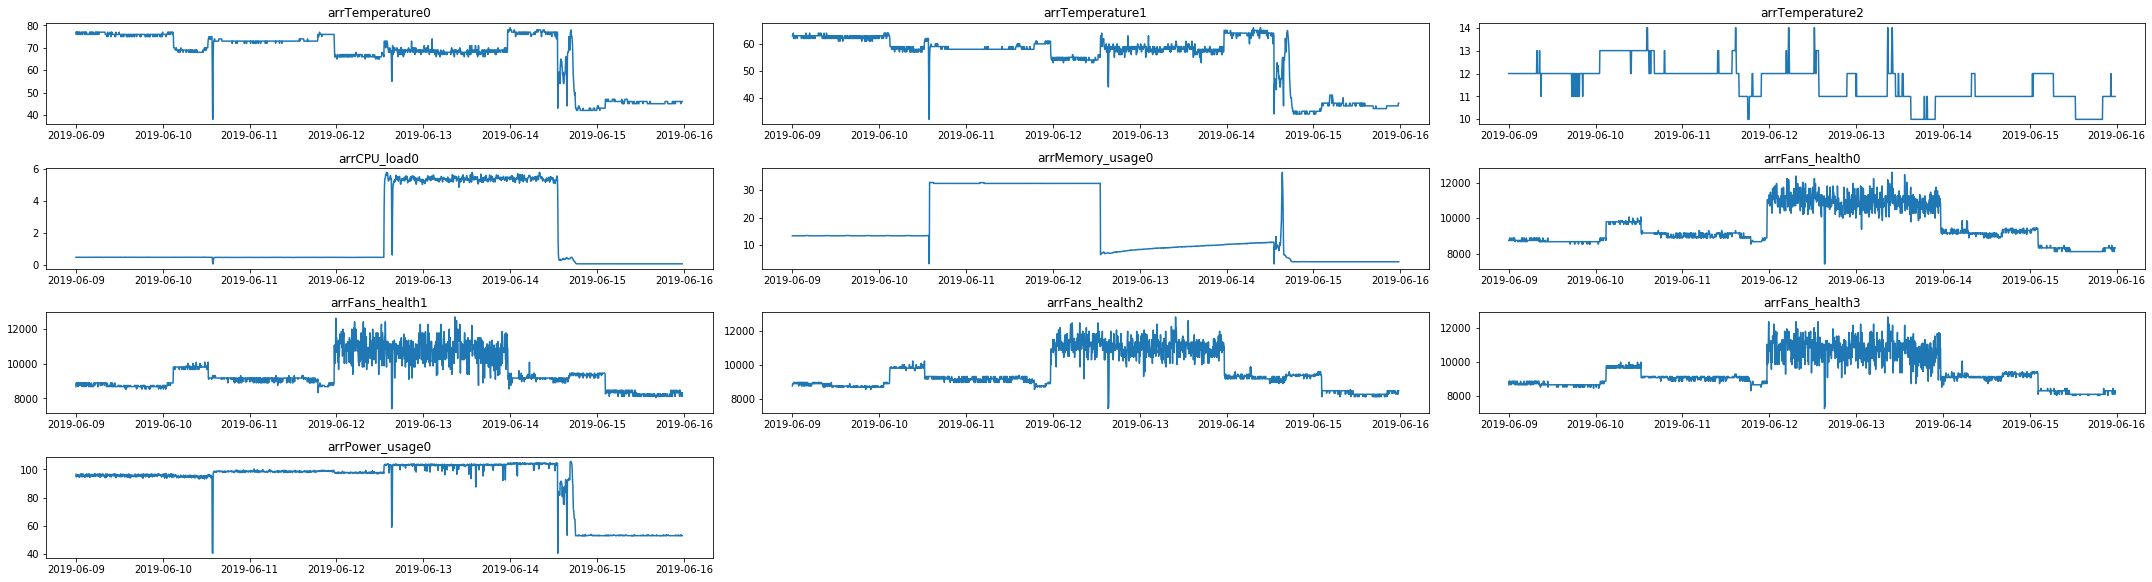

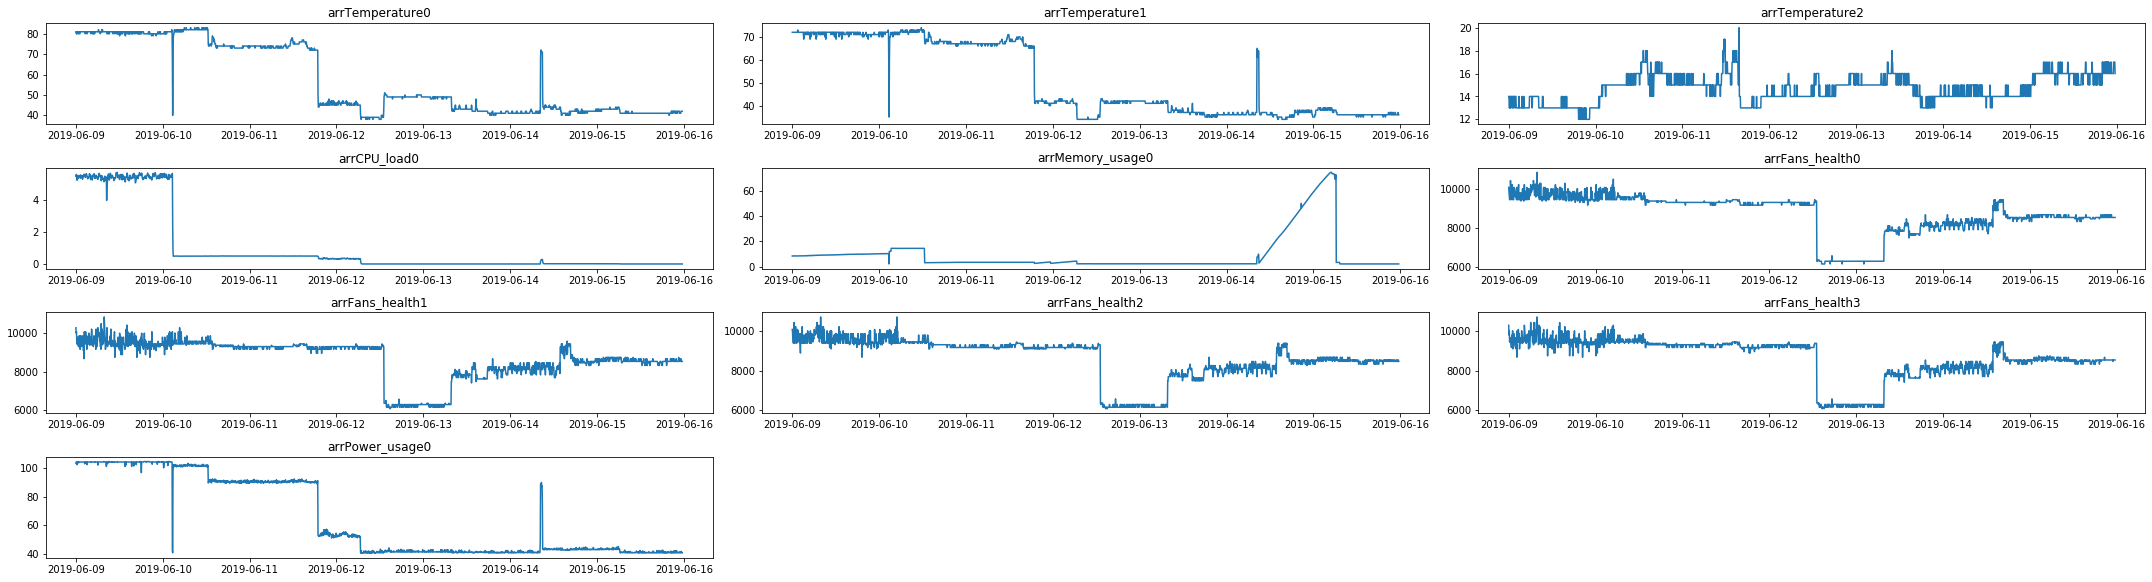

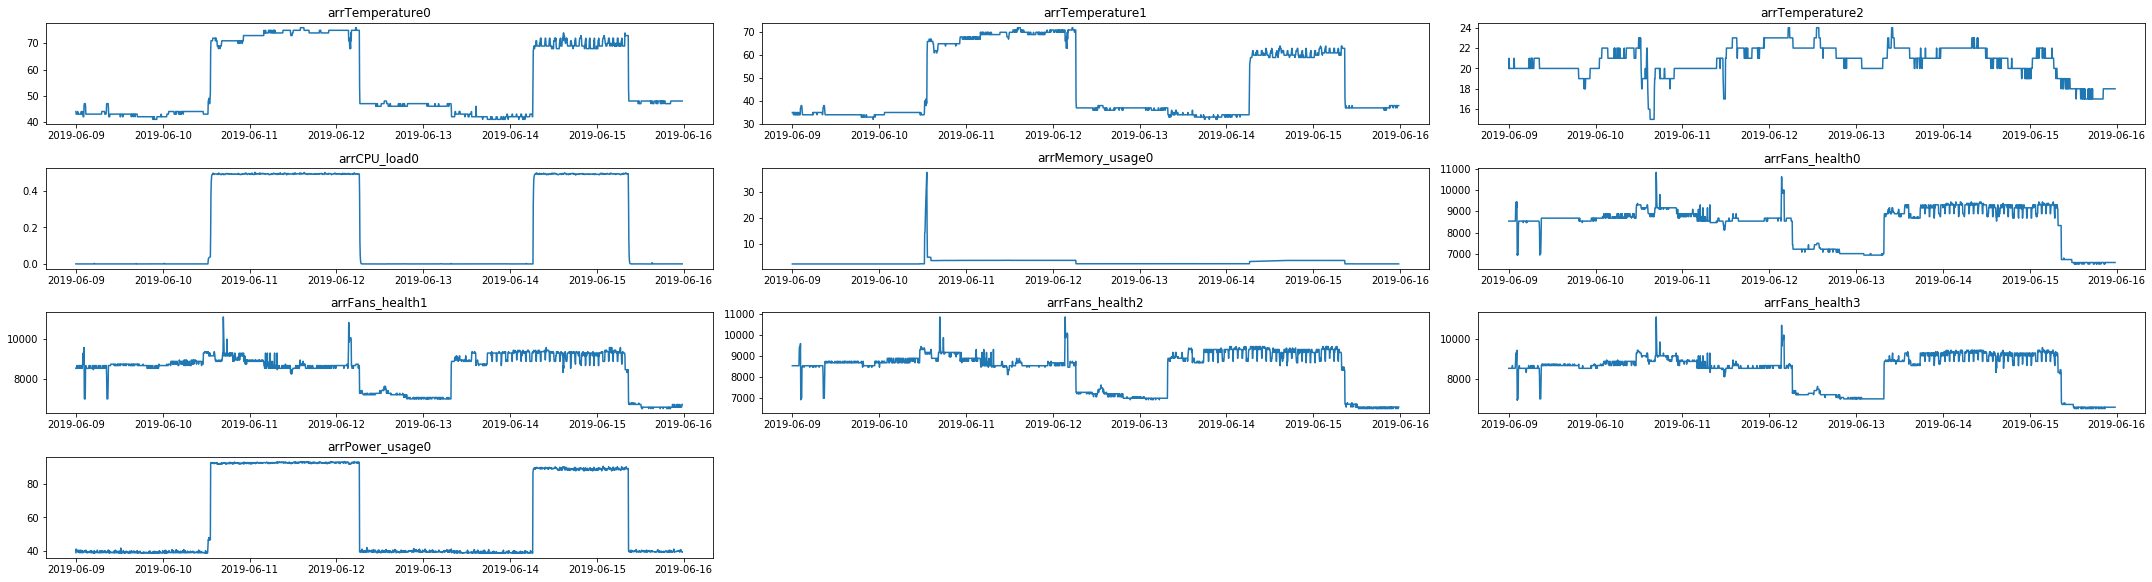

In [14]:
for x in np.random.randint(0, len(computes), 3):
    plotAttrDataOfId(df, computes[x], features)

In [15]:
def plotDataDistribution(data, features):
    plt.figure(figsize=(30, 10))
    for i, v in enumerate(features):
        plt.subplot(3, 10, i+1)
        sns.distplot(list(data[v].values))
        plt.title(v)
    plt.tight_layout()

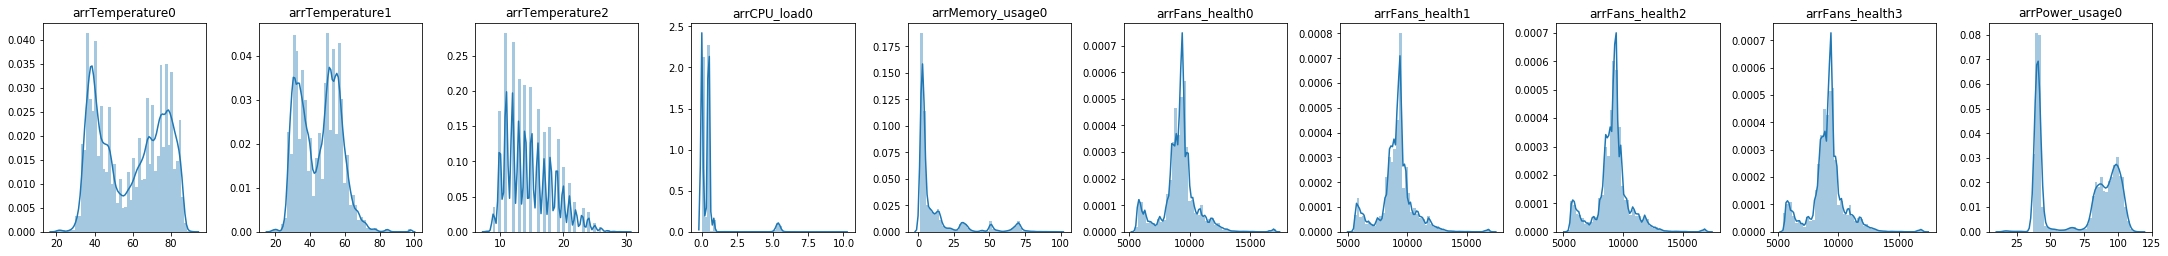

In [16]:
plotDataDistribution(df, features)

# Generate sequences
May need to fill forward (time sampling)

In [17]:
X_dfs = []
y = []
numberOfSequences = 1
sequenceSteps = 100
# generate training data.
randSteps = [120, 220]
for randStep in randSteps:
    for compute in computes:
        cDf = df[df['compute']==compute]
    #     print(cDf)
        if(len(cDf) > sequenceSteps):
#             print("rand step: ",randSteps)
            X_dfs.append(cDf.iloc[randStep:randStep+sequenceSteps])
            y.append(X_dfs[-1][target].values[-1])

In [18]:
print(len(X_dfs))
print(X_dfs[0:465])
# print(y[0:465])

print(X_dfs[466:931])
# print(y[466:931])

932
[         compute                  timespan arrTemperature0 arrTemperature1  \
120  compute-1-1 2019-06-09 10:00:00+00:00              73              59   
121  compute-1-1 2019-06-09 10:05:00+00:00              73              59   
122  compute-1-1 2019-06-09 10:10:00+00:00              73              59   
123  compute-1-1 2019-06-09 10:15:00+00:00              73              59   
124  compute-1-1 2019-06-09 10:20:00+00:00              73              59   
..           ...                       ...             ...             ...   
215  compute-1-1 2019-06-09 17:55:00+00:00              73              59   
216  compute-1-1 2019-06-09 18:00:00+00:00              73              59   
217  compute-1-1 2019-06-09 18:05:00+00:00              73              59   
218  compute-1-1 2019-06-09 18:10:00+00:00              72              58   
219  compute-1-1 2019-06-09 18:15:00+00:00              73              59   

    arrTemperature2 arrCPU_load0 arrMemory_usage0 arrFans_

[         compute                  timespan arrTemperature0 arrTemperature1  \
220  compute-1-1 2019-06-09 18:20:00+00:00              73              59   
221  compute-1-1 2019-06-09 18:25:00+00:00              73              59   
222  compute-1-1 2019-06-09 18:30:00+00:00              73              59   
223  compute-1-1 2019-06-09 18:35:00+00:00              73              59   
224  compute-1-1 2019-06-09 18:40:00+00:00              73              59   
..           ...                       ...             ...             ...   
315  compute-1-1 2019-06-10 02:15:00+00:00              46              39   
316  compute-1-1 2019-06-10 02:20:00+00:00              45              39   
317  compute-1-1 2019-06-10 02:25:00+00:00              44              37   
318  compute-1-1 2019-06-10 02:30:00+00:00              44              37   
319  compute-1-1 2019-06-10 02:35:00+00:00              43              38   

    arrTemperature2 arrCPU_load0 arrMemory_usage0 arrFans_heal

In [ ]:
from sklearn.model_selection import train_test_split
X_train_dfs, X_test_dfs, y_train, y_test = train_test_split(X_dfs, y, test_size=0.33)

In [19]:
X_train_dfs = X_dfs[0:465]
X_test_dfs = X_dfs[466:931]
y_train = y[0:465]
y_test = y[466:931]

print(X_train_dfs)

[         compute                  timespan arrTemperature0 arrTemperature1  \
120  compute-1-1 2019-06-09 10:00:00+00:00              73              59   
121  compute-1-1 2019-06-09 10:05:00+00:00              73              59   
122  compute-1-1 2019-06-09 10:10:00+00:00              73              59   
123  compute-1-1 2019-06-09 10:15:00+00:00              73              59   
124  compute-1-1 2019-06-09 10:20:00+00:00              73              59   
..           ...                       ...             ...             ...   
215  compute-1-1 2019-06-09 17:55:00+00:00              73              59   
216  compute-1-1 2019-06-09 18:00:00+00:00              73              59   
217  compute-1-1 2019-06-09 18:05:00+00:00              73              59   
218  compute-1-1 2019-06-09 18:10:00+00:00              72              58   
219  compute-1-1 2019-06-09 18:15:00+00:00              73              59   

    arrTemperature2 arrCPU_load0 arrMemory_usage0 arrFans_heal

# Scale

In [20]:
# combine the training data to create a scaler
train_dfs = pd.concat(X_train_dfs)
print(train_dfs['arrTemperature0'].var(axis=0))

291.536804994997


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_dfs[features].values)
print([x for x in scaler.mean_])
print([x for x in scaler.var_])

temp = scaler.transform(X_train_dfs[311][features].values)

[53.870559139784945, 42.39038709677419, 14.512537634408602, 0.6334405351827956, 10.465089230704407, 8761.725376344086, 8680.030107526882, 8732.700215053763, 8687.23182795699, 62.115396505376346]
[291.53053538628745, 143.26108178563996, 11.104122377615907, 2.2530822640071286, 240.0361788776631, 3840694.00587217, 3723036.6485559028, 3827259.7410967285, 3760530.57378268, 783.3061691136168]


In [22]:
X_train = np.array([scaler.transform(item[features].values) for item in X_train_dfs])
X_test = np.array([scaler.transform(item[features].values) for item in X_test_dfs])

In [23]:
# for record in X_train

In [24]:
print(np.max(X_train))
print(np.min(X_train))
X_train_temp = [scaler.transform(item[features].values) for item in X_train_dfs]
for item in X_train_dfs:
    print (scaler.transform(item[features].values))

5.203418988605236
-2.0377672578888233
[[ 1.12036685e+00  1.38769939e+00  1.94685108e+00  3.25640261e+00
  -7.89151070e-02  2.79764942e-01  2.17655428e-01  2.23529731e-01
   2.48951111e-01  1.53227115e+00]
 [ 1.12036685e+00  1.38769939e+00  1.94685108e+00  3.17294109e+00
  -8.18411979e-02  6.54539553e-02 -1.56036582e-05  8.04052044e-02
   3.23679295e-02  1.53227115e+00]
 [ 1.12036685e+00  1.38769939e+00  1.94685108e+00  3.12130977e+00
  -7.83433421e-02  6.54539553e-02  1.08819912e-01  8.04052044e-02
   1.40659520e-01  1.54343681e+00]
 [ 1.12036685e+00  1.38769939e+00  1.94685108e+00  3.21902087e+00
  -7.98904706e-02  6.54539553e-02  3.62629015e-02  8.84294117e-03
   1.04562323e-01  1.53227115e+00]
 [ 1.12036685e+00  1.38769939e+00  1.94685108e+00  3.22540517e+00
  -8.38591917e-02  2.08327947e-01  3.26490943e-01  3.30873126e-01
   2.48951111e-01  1.53227115e+00]
 [ 1.12036685e+00  1.38769939e+00  1.94685108e+00  3.10974369e+00
  -7.88478405e-02  6.54539553e-02  1.08819912e-01  8.04052044

   0.39904795  0.33087313  0.3572427  -0.73435704]]
[[1.53034057 0.46867175 0.44637911 0.14436679 1.54805873 0.35120194
  0.39904795 0.33087313 0.3572427  1.35362066]
 [1.53034057 0.46867175 0.44637911 0.14038818 1.55095119 0.35120194
  0.39904795 0.33087313 0.3572427  1.27546106]
 [1.58890824 0.55221972 0.44637911 0.13187535 1.54829416 0.35120194
  0.39904795 0.33087313 0.3572427  1.40944894]
 [1.53034057 0.46867175 0.44637911 0.13437364 1.54809236 0.35120194
  0.39904795 0.33087313 0.3933399  1.53227115]
 [1.58890824 0.55221972 0.44637911 0.13039503 1.54866413 0.42263893
  0.39904795 0.36665426 0.3933399  1.54343681]
 [1.58890824 0.46867175 0.44637911 0.14223825 1.54815963 0.35120194
  0.36276945 0.29509199 0.3572427  1.48760853]
 [1.53034057 0.38512379 0.44637911 0.14075793 1.54832779 0.35120194
  0.39904795 0.29509199 0.3933399  1.49877418]
 [1.53034057 0.46867175 0.44637911 0.14381184 1.54849596 0.35120194
  0.39904795 0.33087313 0.3572427  1.49877418]
 [1.53034057 0.55221972 0.44

[[ 1.53034057e+00  1.63834329e+00  1.64675668e+00  3.27500121e+00
  -5.01923292e-02  4.58357432e-01  5.07883469e-01  5.45559915e-01
   5.73825883e-01  1.52110550e+00]
 [ 1.58890824e+00  1.63834329e+00  1.64675668e+00  3.22855101e+00
  -5.14367586e-02  3.15483440e-01  3.62769448e-01  3.30873126e-01
   3.93339898e-01  1.50993984e+00]
 [ 1.58890824e+00  1.72189126e+00  1.64675668e+00  3.11733117e+00
  -4.83425015e-02  4.22638934e-01  3.62629015e-02  4.73997652e-01
   1.04562323e-01  1.52110550e+00]
 [ 1.58890824e+00  1.72189126e+00  1.64675668e+00  3.07967162e+00
  -4.75689373e-02  4.22638934e-01  3.26490943e-01  4.38216521e-01
   3.57242701e-01  1.53227115e+00]
 [ 1.58890824e+00  1.63834329e+00  1.64675668e+00  3.07273170e+00
  -4.65935736e-02  3.51201938e-01  3.99047954e-01  3.66654257e-01
   3.93339898e-01  1.50993984e+00]
 [ 1.58890824e+00  1.63834329e+00  1.64675668e+00  3.19283480e+00
  -5.05959279e-02  3.51201938e-01  3.62769448e-01  3.66654257e-01
   4.65534292e-01  1.53227115e+00

[[-9.29501731e-01 -8.68095719e-01 -7.53998455e-01 -4.21819531e-01
  -5.50352082e-01 -5.98304042e-03 -1.56036582e-05  8.84294117e-03
  -3.72926739e-03 -7.67854007e-01]
 [-9.29501731e-01 -8.68095719e-01 -7.53998455e-01 -4.21726928e-01
  -5.48603154e-01 -5.98304042e-03  1.08819912e-01  1.16186336e-01
   1.04562323e-01 -7.67854007e-01]
 [-9.29501731e-01 -8.68095719e-01 -7.53998455e-01 -4.21726928e-01
  -5.50183916e-01 -4.17015383e-02 -1.56036582e-05  8.84294117e-03
  -3.72926739e-03 -7.56688351e-01]
 [-9.29501731e-01 -8.68095719e-01 -7.53998455e-01 -4.21726928e-01
  -5.50318449e-01 -4.17015383e-02  3.62629015e-02  8.84294117e-03
  -3.72926739e-03 -7.67854007e-01]
 [-9.29501731e-01 -8.68095719e-01 -7.53998455e-01 -4.21634325e-01
  -5.50284816e-01 -4.17015383e-02 -1.56036582e-05 -2.69381904e-02
  -3.72926739e-03 -7.79019663e-01]
 [-9.29501731e-01 -8.68095719e-01 -7.53998455e-01 -4.21634325e-01
  -5.50318449e-01 -4.17015383e-02 -1.56036582e-05  8.84294117e-03
  -7.59236611e-02 -7.79019663e-01

  -1.55999133 -1.56552685 -1.55590873 -0.75668835]]
[[-6.36663362e-01 -5.33903851e-01 -1.35418724e+00 -4.21542388e-01
  -5.29802179e-01 -1.54187845e+00 -1.55999133e+00 -1.56552685e+00
  -1.51981154e+00 -7.45522695e-01]
 [-6.36663362e-01 -5.33903851e-01 -1.35418724e+00 -4.21634325e-01
  -5.29734913e-01 -1.54187845e+00 -1.55999133e+00 -1.56552685e+00
  -1.51981154e+00 -7.45522695e-01]
 [-6.36663362e-01 -5.33903851e-01 -1.35418724e+00 -4.21634325e-01
  -5.27414220e-01 -1.57759695e+00 -1.55999133e+00 -1.56552685e+00
  -1.55590873e+00 -7.23191383e-01]
 [-6.36663362e-01 -5.33903851e-01 -1.35418724e+00 -4.21726928e-01
  -5.29869446e-01 -1.57759695e+00 -1.55999133e+00 -1.56552685e+00
  -1.51981154e+00 -7.45522695e-01]
 [-6.36663362e-01 -5.33903851e-01 -1.35418724e+00 -4.21542388e-01
  -5.29835812e-01 -1.57759695e+00 -1.55999133e+00 -1.56552685e+00
  -1.55590873e+00 -7.23191383e-01]
 [-6.36663362e-01 -5.33903851e-01 -1.35418724e+00 -4.21542388e-01
  -5.28826815e-01 -1.54187845e+00 -1.55999133e+

  -1.45115581 -1.42240232 -1.41151995 -0.6673631 ]]
[[-0.57809569 -0.53390385 -0.45390406 -0.42144978 -0.20736041 -1.43472295
  -1.45115581 -1.42240232 -1.41151995 -0.76785401]
 [-0.57809569 -0.53390385 -0.45390406 -0.42135718 -0.20742768 -1.43472295
  -1.45115581 -1.35084006 -1.41151995 -0.77901966]
 [-0.57809569 -0.53390385 -0.45390406 -0.42135718 -0.20736041 -1.43472295
  -1.45115581 -1.42240232 -1.41151995 -0.77901966]
 [-0.57809569 -0.53390385 -0.45390406 -0.42144978 -0.20736041 -1.43472295
  -1.45115581 -1.42240232 -1.41151995 -0.75668835]
 [-0.57809569 -0.53390385 -0.45390406 -0.42154239 -0.20746131 -1.43472295
  -1.41487731 -1.42240232 -1.41151995 -0.76785401]
 [-0.57809569 -0.53390385 -0.45390406 -0.42144978 -0.20739404 -1.43472295
  -1.41487731 -1.42240232 -1.41151995 -0.75668835]
 [-0.57809569 -0.53390385 -0.45390406 -0.42107937 -0.20749494 -1.43472295
  -1.45115581 -1.42240232 -1.41151995 -0.74552269]
 [-0.57809569 -0.53390385 -0.45390406 -0.42154239 -0.20736041 -1.43472295

[[ 0.59325779  0.63576769 -1.05409285 -0.27303274  0.0897219  -1.22041197
  -1.19720628 -1.13615327 -1.12274237  0.19239242]
 [ 0.59325779  0.63576769 -1.05409285 -0.27321795  0.08730031 -1.22041197
  -1.12464926 -1.13615327 -1.12274237  0.19239242]
 [ 0.59325779  0.55221972 -1.05409285 -0.27340249  0.08713215 -1.22041197
  -1.23348478 -1.20771553 -1.23103396  0.19239242]
 [ 0.59325779  0.55221972 -1.05409285 -0.27358769  0.08716578 -1.14897497
  -1.12464926 -1.13615327 -1.19493676  0.19239242]
 [ 0.59325779  0.55221972 -1.05409285 -0.27349509  0.08713215 -1.14897497
  -1.12464926 -1.13615327 -1.19493676  0.19239242]
 [ 0.59325779  0.55221972 -1.05409285 -0.27331055  0.08709851 -1.22041197
  -1.19720628 -1.20771553 -1.19493676  0.18122676]
 [ 0.59325779  0.55221972 -1.05409285 -0.27294014  0.08962101 -1.22041197
  -1.19720628 -1.20771553 -1.19493676  0.20355808]
 [ 0.59325779  0.55221972 -1.05409285 -0.27358769  0.08709851 -1.22041197
  -1.19720628 -1.13615327 -1.19493676  0.19239242]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[-0.16812197 -0.03261605  1.34666229 -0.42154239 -0.54951125 -1.00610098
  -0.97953524 -0.99302874 -0.97835358 -0.74552269]
 [-0.16812197 -0.03261605  1.34666229 -0.42172693 -0.55055388 -0.93466398
  -1.01581375 -0.99302874 -0.97835358 -0.75668835]
 [-0.16812197 -0.03261605  1.34666229 -0.42172693 -0.55062115 -0.93466398
  -0.97953524 -0.99302874 -0.97835358 -0.75668835]
 [-0.16812197 -0.03261605  1.34666229 -0.42172693 -0.55058751 -1.00610098
  -0.97953524 -0.99302874 -0.97835358 -0.75668835]
 [-0.16812197 -0.03261605  1.34666229 -0.42163432 -0.55058751 -0.93466398
  -0.97953524 -0.99302874 -0.97835358 -0.74552269]
 [-0.16812197 -0.03261605  1.34666229 -0.42163432 -0.55055388 -0.93466398
  -0.97953524 -0.99302874 -0.97835358 -0.75668835]
 [-0.16812197 -0.03261605  1.34666229 -0.42154239 -0.55058751 -0.93466398
  -0.97953524 -0.99302874 -0.97835358 -0.74552269]
 [-0.16812197 -0.03261605  1.34666229 -0.42172693 -0.55058751 -0.93466398
  -0.97953524 -0.99302874 -0.97835358 -0.72319138]


[[-1.04663708 -0.78454775 -0.15380967 -0.42163432 -0.52896135  0.20832795
   0.25393393  0.22352973  0.24895111 -0.81251663]
 [-1.04663708 -0.86809572 -0.15380967 -0.42163432 -0.52714515  0.20832795
   0.21765543  0.22352973  0.3211455  -0.81251663]
 [-1.04663708 -0.86809572 -0.15380967 -0.42172693 -0.52875955  0.20832795
   0.25393393  0.1877486   0.24895111 -0.82368229]
 [-1.04663708 -0.86809572 -0.15380967 -0.42191213 -0.52892772  0.27976494
   0.25393393  0.22352973  0.3211455  -0.82368229]
 [-1.10520475 -0.86809572 -0.15380967 -0.42172693 -0.52879318  0.20832795
   0.25393393  0.22352973  0.24895111 -0.82368229]
 [-1.10520475 -0.86809572 -0.15380967 -0.42191213 -0.52879318  0.20832795
   0.25393393  0.22352973  0.3211455  -0.81251663]
 [-1.04663708 -0.86809572 -0.15380967 -0.42172693 -0.52875955  0.20832795
   0.21765543  0.1877486   0.3211455  -0.82368229]
 [-1.10520475 -0.86809572 -0.15380967 -0.42154239 -0.52875955  0.20832795
   0.25393393  0.22352973  0.3211455  -0.77901966]


[[1.82317894 1.88898719 1.94685108 0.15944913 1.48059047 0.56551293
  0.58044048 0.54555992 0.57382588 1.35362066]
 [1.82317894 1.88898719 1.94685108 0.14658727 1.48059047 0.56551293
  0.58044048 0.58134105 0.60992308 1.342455  ]
 [1.82317894 1.88898719 1.94685108 0.14714289 1.4805232  0.56551293
  0.50788347 0.54555992 0.57382588 1.342455  ]
 [1.82317894 1.88898719 1.94685108 0.14260866 1.4806241  0.56551293
  0.58044048 0.54555992 0.60992308 1.35362066]
 [1.82317894 1.88898719 1.94685108 0.15454516 1.48045594 0.56551293
  0.58044048 0.54555992 0.57382588 1.35362066]
 [1.82317894 1.88898719 1.94685108 0.15537792 1.48055684 0.56551293
  0.58044048 0.54555992 0.57382588 1.342455  ]
 [1.82317894 1.88898719 1.94685108 0.15648783 1.48035504 0.56551293
  0.58044048 0.58134105 0.57382588 1.342455  ]
 [1.82317894 1.88898719 1.94685108 0.157691   1.48069137 0.56551293
  0.58044048 0.54555992 0.60992308 1.342455  ]
 [1.82317894 1.88898719 1.94685108 0.15611808 1.4829448  0.56551293
  0.58044048

In [25]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
sns.distplot(y_train)

In [ ]:
sns.distplot(y_test)

In [ ]:
print (len(y_train))
print (len(y_test))
print(y_train)
print(y_test)

# Export data

In [26]:
from IPython.display import FileLink

In [27]:
import codecs, json

In [28]:
def exportNPArrayToJson(a, fileName):
    b = a.tolist()
    json.dump(b, codecs.open(fileName, 'w', encoding='utf-8'))

In [29]:
exportNPArrayToJson(X_train, 'X_train_HPCC_1_100.json')
exportNPArrayToJson(X_test, 'X_test_HPCC_1_100.json')
exportNPArrayToJson(y_train, 'y_train_HPCC_1_100.json')
exportNPArrayToJson(y_test, 'y_test_HPCC_1_100.json')

In [30]:
FileLink('X_train_HPCC_1_100.json')

/Users/haovan/Documents/HaoVanWorkspace/H/VCNN/data/preprocessing/X_train_HPCC_1_100.json

In [31]:
FileLink('X_test_HPCC_1_100.json')

/Users/haovan/Documents/HaoVanWorkspace/H/VCNN/data/preprocessing/X_test_HPCC_1_100.json

In [32]:
FileLink('y_train_HPCC_1_100.json')

/Users/haovan/Documents/HaoVanWorkspace/H/VCNN/data/preprocessing/y_train_HPCC_1_100.json

In [33]:
FileLink('y_test_HPCC_1_100.json')

/Users/haovan/Documents/HaoVanWorkspace/H/VCNN/data/preprocessing/y_test_HPCC_1_100.json

In [34]:
FileLink('X_train_HPCC_1_100.json')
FileLink('X_train_HPCC_1_100.json')
FileLink('X_train_HPCC_1_100.json')
FileLink('X_train_HPCC_1_100.json')

/Users/haovan/Documents/HaoVanWorkspace/H/VCNN/data/preprocessing/X_train_HPCC_1_100.json

In [ ]:
from keras import regularizers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Flatten

# from keras import backend as K
# K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=36, inter_op_parallelism_threads=36)))


def createModel(l1Nodes, l2Nodes, d1Nodes, d2Nodes, inputShape):
    # input layer
    lstm1 = LSTM(l1Nodes, input_shape=inputShape, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))
    do1 = Dropout(0.2)
    
    lstm2 = LSTM(l2Nodes, return_sequences=True, kernel_regularizer=regularizers.l2(0.1))
    do2 = Dropout(0.2)
    
    flatten = Flatten()
    
    dense1 = Dense(d1Nodes, activation='relu')
    do3 = Dropout(0.2)
    
    dense2 = Dense(d2Nodes, activation='relu')
    do4 = Dropout(0.2)
    
    # output layer
    outL = Dense(1, activation='relu')
    # combine the layers
#     layers = [lstm1, do1, lstm2, do2, dense1, do3, dense2, do4, outL]
    layers = [lstm1, lstm2, flatten,  dense1, dense2, outL]
    # create the model
    model = Sequential(layers)
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model
# ten fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=3, shuffle=True)
from keras.models import load_model
msescores = []
counter= 0



for trainIdx, testIdx in kfold.split(X_train, y_train):
    counter = counter + 1
    # create callbacks
    model_path = 'best_model_fold'+str(counter)+'.h5'
    mc = ModelCheckpoint(model_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
    es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)
    # create model
    model = createModel(64, 64, 8, 8, (X_train.shape[1], X_train.shape[2]))
    model.fit(X_train[trainIdx], y_train[trainIdx], validation_data=(X_train[testIdx], y_train[testIdx]), batch_size=32, epochs=40, callbacks=[mc, es])
    # Done load the best model of this fold
    saved_model = load_model(model_path)
    msescores.append({'path': model_path, 'mse': saved_model.evaluate(X_train[testIdx], y_train[testIdx])})

In [ ]:
msescores

In [ ]:
for md in msescores:
    saved_model = load_model(md['path'])
    print(saved_model.evaluate(X_test, y_test))

In [ ]:
best_model = load_model(msescores[np.argmin([sc['mse'] for sc in msescores])]['path'])

In [ ]:
predicted = saved_model.predict(X_test)

In [ ]:
baseline = np.array([df[predictedVar].values[-1] for df in X_test_dfs])

In [ ]:
plt.figure(figsize=(50, 10))
plt.plot(range(50), predicted[:50], 'x', label='predicted')
plt.plot(range(50), baseline[:50], 'v', label='baseline')
plt.plot(range(50), y_test[:50], 'o', label='actual')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predicted)
msebaseline = mean_squared_error(y_test, baseline)

In [ ]:
print('mse=', mse)
print('msebaseline=', msebaseline)

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.predict_classes

In [ ]:
print (X_train[0].mean())
print (scaler.mean_[0])
print (scaler.var_[0])

In [ ]:
from sklearn import preprocessing
print(train_dfs['arrTemperature0'])


In [ ]:
sc = StandardScaler().fit([[0,1], [1,2], [2,3], [3,4], [4,5], [1000002,13]])

In [ ]:
print(sc.mean_)
print(sc.var_)

In [ ]:
sc.transform([[0,1], [1,2], [2,3], [3,4], [4,5], [1000002,13]])

In [ ]:
sc_ = StandardScaler().fit([[-0.44721896, -0.92966968],
       [-0.44721628, -0.6761234 ],
       [-0.4472136 , -0.42257713],
       [-0.44721091, -0.16903085],
       [-0.44720823,  0.08451543],
       [ 2.23606798,  2.11288564]])

In [ ]:
print(sc_.mean_)
print(sc_.var_)